<a href="https://www.kaggle.com/code/edgarmuyale/cats-and-dogs-classifications-using-svm?scriptVersionId=154120101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [10]:
import glob
import random
from pathlib import Path
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [11]:
%%capture
!unzip /kaggle/input/dogs-vs-cats/train.zip -d /kaggle/working/

In [5]:
%%capture
!unzip /kaggle/input/dogs-vs-cats/test1.zip -d /kaggle/working/

In [12]:
for path in glob.glob('/kaggle/working/train/*.jpg'):
    if not(os.path.exists('/kaggle/working/train/cat') or os.path.exists('/kaggle/working/train/dog')):
        os.makedirs('/kaggle/working/train/cat')
        os.makedirs('/kaggle/working/train/dog')
        print('Done!')
        
    if 'cat' in path:
        shutil.move(path, '/kaggle/working/train/cat/' + path.split('/')[-1])
    else:
        shutil.move(path, '/kaggle/working/train/dog/' + path.split('/')[-1])
    

In [16]:
my_dataset = {}
for class_name in glob.glob('/kaggle/working/train/*'):
        my_dataset[class_name.split('/')[-1]] = glob.glob(class_name + '/*')

In [17]:
print(f"These are the keys in my dataset {my_dataset.keys()}")

These are the keys in my dataset dict_keys(['cat', 'dog'])


In [19]:
X   = my_dataset.keys()
y = [len(keys)for keys in dataset.values()]

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [24]:
print(f"The shape of my data before splitting is {y}") #There are a total of 12500 cat images and 12500 Dog images 

[12500, 12500]


# **IMAGE REPRESENTATION IN PYTHON **


In machine learning and python in general images are represented in HWC or CHW format . This is to mean that we describe images as their heights widths and color channels.Images can be represented by numpy multi-dimensional arrays and so their type is NdArrays. A color image is a numpy array with 3 dimensions. By slicing the multi-dimensional array the RGB channels can be separated.
In an RGB image, each pixel is represented by three 8 bit numbers associated to the values for Red, Green, Blue respectively

In [29]:
# Having the image representation idea we can go further and try plotting some of the images
# What if we created a dataframe that has Height Width and ColorChannels and the Class or label?
# Using cv2 we can load our image properties 
import cv2 as cv
help(cv.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   AVIF - \*.avif (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM 

In [30]:
def image_properties(file):
    '''Returns dimenstions for an image interms of HWD or HWC'''
    image = cv2.imread(file)    
    h, w, d = image.shape
    return h, w, d 

# Creating a Dataframe


In [63]:
df = pd.DataFrame(columns=['Height',
                           'Width',
                           'Channels',
                           'Class'])

for pet_class in my_dataset.keys():
    for path in my_dataset[pet_class]:
        h, w, d = image_properties(path)
        df.loc[len(df)] = [h, w, d, pet_class]

df

,Height,Width,Channels,Class
0,375,499,3,cat
1,337,500,3,cat
2,375,499,3,cat
3,500,383,3,cat
4,433,500,3,cat
...,...,...,...,...
24995,500,357,3,dog
24996,335,448,3,dog
24997,500,271,3,dog
24998,500,274,3,dog


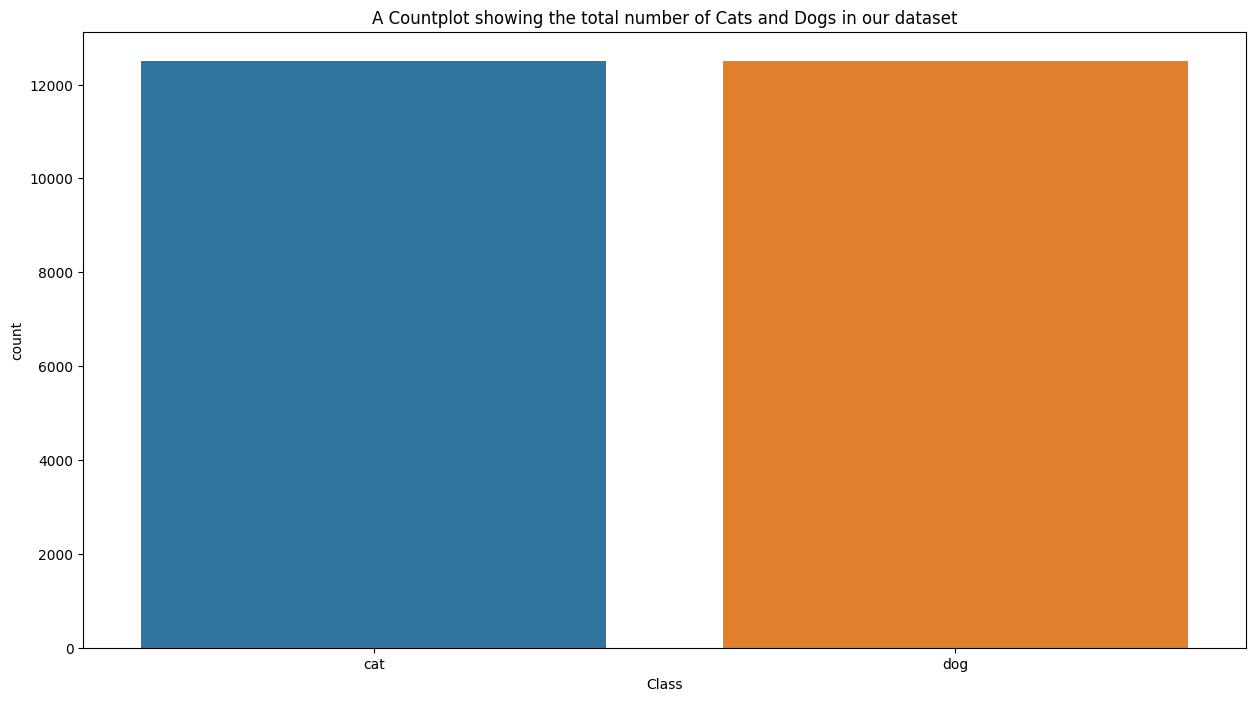

In [38]:
# i CAN VISUALIZE MY CATEGORICAL DATA NOW 
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Class')
plt.title("A Countplot showing the total number of Cats and Dogs in our dataset")
plt.show()

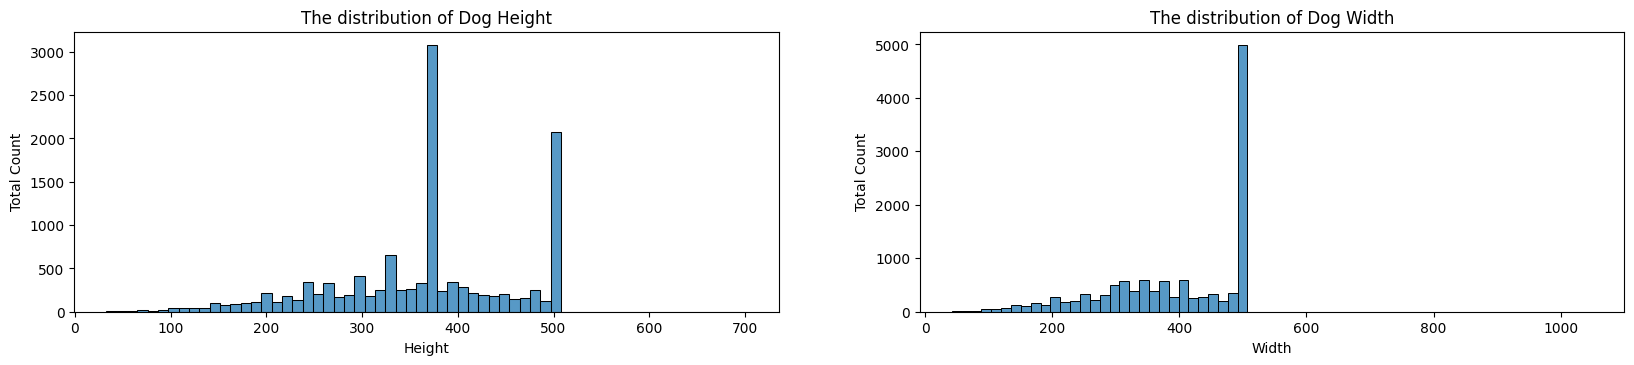

In [44]:
# How are our pet heights  distributed?
# Lets begin with the dogs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='dog']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='dog']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Dog Width')
plt.show()

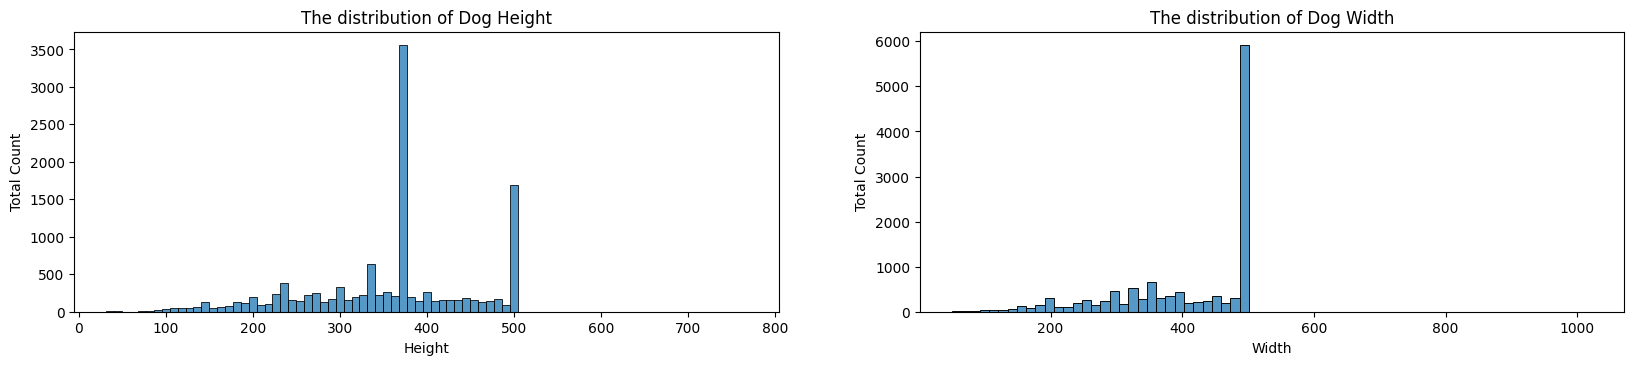

In [45]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(x = df[df['Class']=='cat']['Height'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Height')
plt.subplot(2,2,2)
sns.histplot(x = df[df['Class']=='cat']['Width'])
plt.ylabel("Total Count")
plt.title('The distribution of Cat Width')
plt.show()

# Using CV2 to read our images

* cv2.imread() method loads an image from the specified file

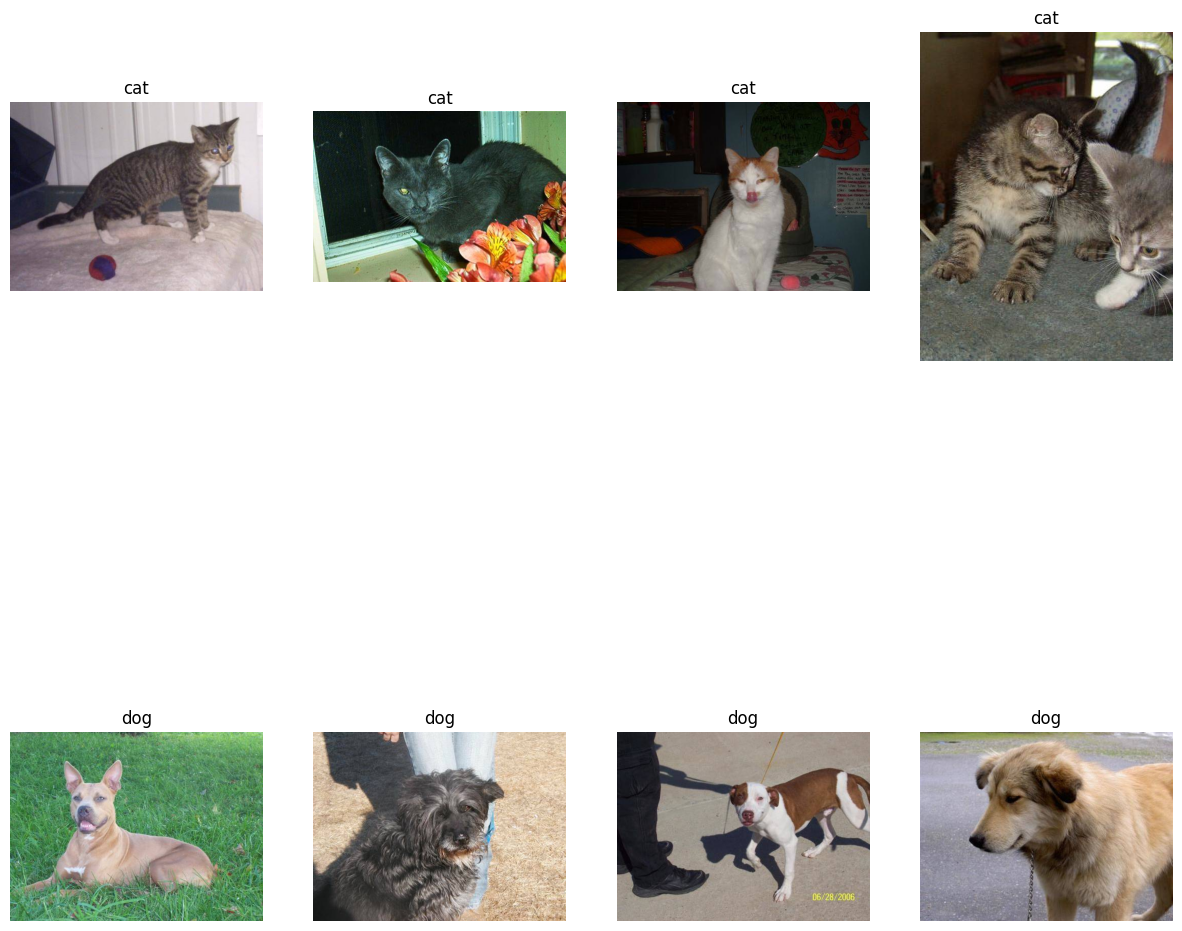

In [65]:
# How about we plot some images ? Exciting visualizations
# Lets go for some  Random Images
count = 0
plt.figure(figsize=(15, 15))
for pet_class in my_dataset.keys():    
    for path in my_dataset[pet_class]:                
        sp = plt.subplot(2, 4, count + 1, )
        sp.axis('Off')
        sp.set_title(pet_class)        
        image = cv.imread(path)
        image = cv.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        count += 1
        if count % 4== 0:            
            break
plt.show()

# DATA PREPROCESSING : SELECTING OUR LABELS AND SCALING DATA 

In [68]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
df['Class'] = lbl_encoder.fit_transform(df['Class'])

In [69]:
df.head()

,Height,Width,Channels,Class
0,375,499,3,0
1,337,500,3,0
2,375,499,3,0
3,500,383,3,0
4,433,500,3,0


In [71]:
df['Class'].value_counts().head()

Class
0    12500
1    12500
Name: count, dtype: int64

In [74]:
# Selecting  feature and target variable
from sklearn.model_selection import train_test_split
X =  df.drop(['Class'],axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [76]:
X_train.shape, y_train.shape

((20000, 3), (20000,))

In [87]:
X_train = X_train/255  # Reshaping my data so that they range between 0 and 1
X_test = X_test/255

In [89]:
X_train

,Height,Width,Channels
6167,1.466667,1.960784,0.011765
3101,1.956863,1.694118,0.011765
17307,0.898039,1.250980,0.011765
3950,1.956863,1.466667,0.011765
893,1.470588,1.956863,0.011765
...,...,...,...
5695,1.682353,1.329412,0.011765
8006,1.023529,1.372549,0.011765
17745,1.811765,1.815686,0.011765
17931,1.466667,1.960784,0.011765


In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [100]:
from sklearn.metrics import classification_report,accuracy_score
svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

In [103]:
print(f"The Classification Report for SVC model is \n{classification_report(y_test,predictions)}")

The Classification Report for SVC model is 
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      2534
           1       0.54      0.47      0.50      2466

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54      0.54      0.54      5000



In [102]:
print(f"The Accuracy score for  my SVC model is \n{accuracy_score(y_test,predictions)*100}%")

The Accuracy score for  my SVC model is 
54.48%


# THE END